In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('yelp.csv')

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df['text_length']= df['text'].apply(len)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

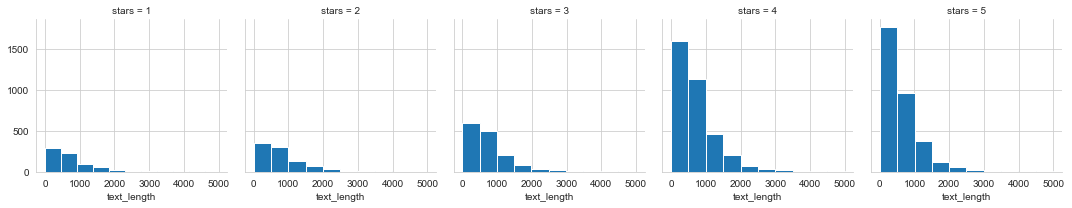

In [7]:
sns.set_style('whitegrid')
g = sns.FacetGrid(data=df,col='stars')
g.map(plt.hist,'text_length')

In [8]:
#here we see some relation between star rating and length of review text

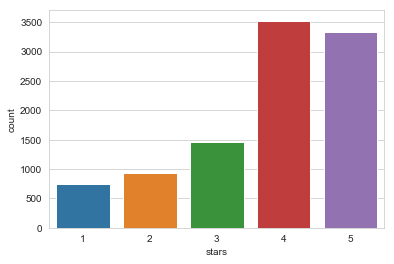

In [10]:
sns.countplot(x='stars', data=df)

In [11]:
stars = df.groupby('stars').mean()
stars

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


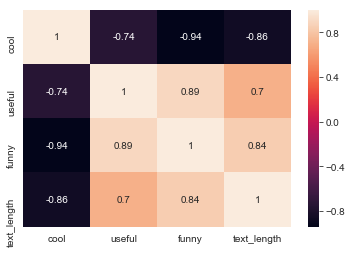

In [15]:
sns.heatmap(stars.corr(), annot=True)

In [21]:
#to classify into 1 or 5 star rating 
yelp_class=df[(df['stars']==1) | (df['stars']==5)]

In [25]:
import nltk

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [61]:
pipeline =Pipeline([
    ('cv', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [62]:
from sklearn.model_selection import train_test_split
X= yelp_class['text'] #features
y = yelp_class['stars'] #class
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)


In [63]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [64]:
predict = pipeline.predict(X_test)

In [65]:
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

          1       0.91      0.68      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.93      0.93      0.92      1226



In [67]:
from sklearn import datasets, linear_model, model_selection, svm
from sklearn.svm import SVC
pipeline2 =Pipeline([
    ('cv', CountVectorizer()),
    ('sv', SVC(kernel='linear'))
])

In [68]:
pipeline2.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_a...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [69]:
prediction = pipeline2.predict(X_test)

In [60]:
print(classification_report(y_test, prediction))

             precision    recall  f1-score   support

          1       0.92      0.79      0.85       228
          5       0.95      0.98      0.97       998

avg / total       0.95      0.95      0.95      1226

